# Movie Prediction

## Importing Important Liberaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import and Explore the Dataset

In [2]:
movies = pd.read_csv("movies.dat", sep="::", names=["MovieID","Title","Genres"])
rating = pd.read_csv("ratings.dat", sep="::", names=["UserID","MovieID","Rating","Timestamp"])

In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [5]:
# Shape of DataSet
rating.shape

(1000209, 4)

In [6]:
rating["UserID"].nunique()

6040

In [7]:
dataset = pd.merge(rating, movies ,on="MovieID").drop("Timestamp", axis=1)

In [8]:
dataset.head()

,UserID,MovieID,Rating,Title,Genres
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama


## Exploratory Data Analysis

### Average Ratings

In [9]:
dataset.groupby("Title").mean()["Rating"]

Title
$1,000,000 Duck (1971)                        3.027027
'Night Mother (1986)                          3.371429
'Til There Was You (1997)                     2.692308
'burbs, The (1989)                            2.910891
...And Justice for All (1979)                 3.713568
                                                ...   
Zed & Two Noughts, A (1985)                   3.413793
Zero Effect (1998)                            3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995)    3.500000
Zeus and Roxanne (1997)                       2.521739
eXistenZ (1999)                               3.256098
Name: Rating, Length: 3706, dtype: float64

### Top 5 Most Watched Movies

In [10]:
dataset.groupby("Title").count()["Rating"].sort_values(ascending=False).head(5)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: Rating, dtype: int64

In [11]:
rating_df = pd.DataFrame(dataset.groupby("Title").mean()["Rating"])

In [12]:
rating_df["Views"] = pd.DataFrame(dataset.groupby("Title").count()["Rating"])

In [13]:
rating_df.head()

,Rating,Views
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


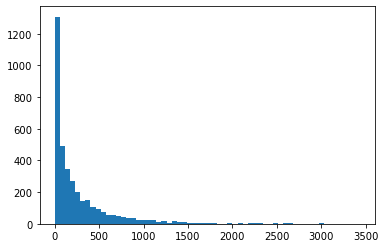

In [32]:
plt.hist(rating_df["Views"], bins=60)
plt.show()

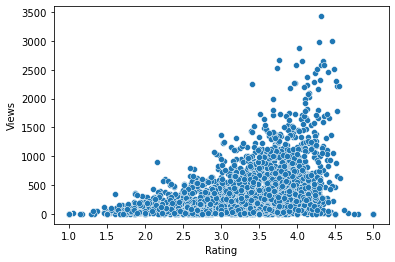

In [14]:
sn.scatterplot(rating_df["Rating"], rating_df["Views"])
plt.show()

In [20]:
print("Number of Genres : ", dataset["Genres"].nunique())

Number of Genres :  301


## Creating Recommendation System

In [39]:
movie_mat = pd.pivot_table(dataset, index="UserID", columns="Title", values="Rating")

In [40]:
movie_mat.head()

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
movie_mat["'Night Mother (1986)"]

UserID
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
6036    3.0
6037    NaN
6038    NaN
6039    NaN
6040    NaN
Name: 'Night Mother (1986), Length: 6040, dtype: float64

In [44]:
movie_mat.corrwith(movie_mat["'Night Mother (1986)"]).sort_values(ascending=False)

Title
Fled (1996)                                   1.0
Autumn Tale, An (Conte d'automne) (1998)      1.0
Supercop (1992)                               1.0
Tales of Terror (1962)                        1.0
Phantasm III: Lord of the Dead (1994)         1.0
                                             ... 
Year of the Horse (1997)                      NaN
You So Crazy (1994)                           NaN
Zachariah (1971)                              NaN
Zero Kelvin (Kjærlighetens kjøtere) (1995)    NaN
Zeus and Roxanne (1997)                       NaN
Length: 3706, dtype: float64

In [63]:
Night_Mother_corr = pd.DataFrame(movie_mat.corrwith(movie_mat["'Night Mother (1986)"]), columns=["Correlation"])
Night_Mother_corr.head()

,Correlation
Title,
"$1,000,000 Duck (1971)",0.522233
'Night Mother (1986),1.000000
'Til There Was You (1997),-0.177705
"'burbs, The (1989)",0.240000
...And Justice for All (1979),0.216272


In [54]:
Night_Mother_corr = Night_Mother_corr.join(rating_df["Views"])

In [62]:
Night_Mother_corr[Night_Mother_corr["Views"]>250].sort_values(by="Correlation", ascending=False)

,Correlation,Views
Title,,
Supercop (1992),1.000000,273
Jaws 2 (1978),0.856099,370
"Messenger: The Story of Joan of Arc, The (1999)",0.834058,341
Hackers (1995),0.810163,321
Inherit the Wind (1960),0.804295,268
...,...,...
Battlefield Earth (2000),-0.771744,342
When We Were Kings (1996),-0.789352,277
Menace II Society (1993),-0.910182,298


In [71]:
def predict(movie_name):
    movie_corr = pd.DataFrame(movie_mat.corrwith(movie_mat[movie_name]), columns=["Correlation"]).dropna()
    movie_corr = movie_corr.join(rating_df["Views"])

    recommended = movie_corr[movie_corr["Views"]>250].sort_values(by="Correlation", ascending=False).head(10)
    return recommended[recommended["Correlation"]!=1]

In [72]:
predict("Hackers (1995)")

,Correlation,Views
Title,,
Hamlet (1990),0.590605,269
Diva (1981),0.559246,257
"Thin Man, The (1934)",0.551075,292
"Story of Us, The (1999)",0.532367,280
Take the Money and Run (1969),0.530228,252
Barb Wire (1996),0.520074,300
Iron Eagle (1986),0.508598,271
"Big Kahuna, The (2000)",0.505685,304
His Girl Friday (1940),0.500100,397
